In [4]:
import sys 
sys.path.append("..") 
import os

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# $\mathbb{B}_4$

In [5]:
n_band = 4
braid_operator_list = [
    BraidOperator(1), BraidOperator(1, True),
    BraidOperator(2), BraidOperator(2, True),
    BraidOperator(3), BraidOperator(3, True)
]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_all_combination_generate_sample(n_length=3)
print("The number of braids: ", len(braid_operator_list_gen))
# for operator_list in braid_operator_list_gen[:10]:
#     show_braid_words(operator_list)

The number of braids:  216


In [6]:
n_core = 8
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

Centers:  [10, 1, 7, 11, 8, 9, 47, 46, 4, 5, 71, 28, 64, 35, 69, 76, 63, 62, 68, 141, 135, 77, 82, 83, 55, 134, 98, 99, 104, 105, 119, 112, 140, 54, 118, 33, 19, 49, 48, 113, 12, 13, 18, 32, 27, 26, 130, 129, 198, 162, 127, 126, 201, 212, 199, 131, 136, 193, 192, 172, 171, 170, 165, 143, 156, 157, 158, 194, 163, 0, 108, 2, 3, 14, 16, 17, 21, 22, 23, 43, 44, 45, 50, 52, 53, 57, 58, 59, 72, 213, 79, 84, 85, 86, 88, 89, 100, 107, 115, 215]
The number of samples:  [13, 13, 13, 13, 11, 11, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


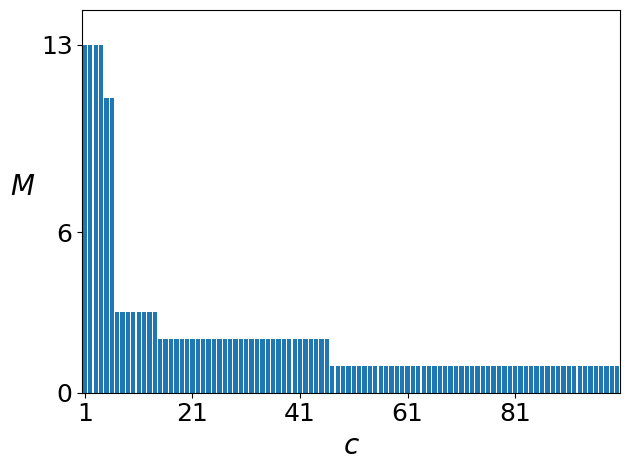

In [8]:
fig = plt.figure()

xticks = list(range(1,len(center_indices)+1, 20))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('B4.svg')

In [9]:
len(group_number)

100

# Save data

In [10]:
directory_name = 'B4'

if not os.path.exists('./fig2/{directory_name}'.format(directory_name=directory_name)):
    os.mkdir('./fig2/{directory_name}'.format(directory_name=directory_name))

with open('./fig2/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))

In [11]:
for i, group in enumerate(groups):
    with open('./fig2/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

In [29]:
with open('./fig2/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=0),'r') as fileop:
    data = fileop.readlines()
    
eval(data[0])

[(1, False), (1, True), (3, False)]

# Extra

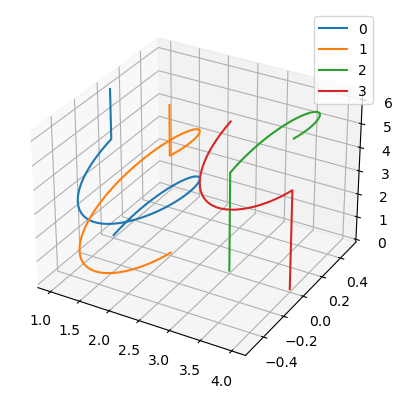

In [12]:
import matplotlib.pyplot as plt


ks = np.linspace(0, 2 * np.pi, 100)

Es = np.array([models[4].get_energies(k) for k in ks])
ax = plt.figure().add_subplot(projection='3d')
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    ax.plot(x, y, ks, label='{0}'.format(index))
    ax.legend()

plt.show()